In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Air_India_2005_2024_Dataset.csv")

In [5]:
df.head()

,Year,Revenue (Cr),Net Profit/Loss (Cr),Passengers (Millions),Fleet Size,Load Factor (%),Freight (000 Tonnes)
0,2005,8834,14.94,4.86,74,66.9,95.7
1,2006,9677,162.90,4.40,74,66.2,105.1
2,2007,10500,-541.30,5.00,82,63.2,110.0
3,2008,12000,-2226.00,5.50,90,62.0,115.0
4,2009,13500,-5548.00,6.00,100,61.0,120.0


In [6]:
df.tail()

,Year,Revenue (Cr),Net Profit/Loss (Cr),Passengers (Millions),Fleet Size,Load Factor (%),Freight (000 Tonnes)
15,2020,12104,-7083.0,6.3,124,68.4,74.9
16,2021,19815,-9591.0,11.5,165,73.5,169.0
17,2022,31377,-11388.0,18.5,127,81.9,175.0
18,2023,38812,-4444.0,21.0,137,82.5,180.0
19,2024,42000,-2500.0,23.0,150,83.0,190.0


In [7]:
df.dtypes

Year                       int64
Revenue (Cr)               int64
Net Profit/Loss (Cr)     float64
Passengers (Millions)    float64
Fleet Size                 int64
Load Factor (%)          float64
Freight (000 Tonnes)     float64
dtype: object

In [8]:
df.isnull().sum()

Year                     0
Revenue (Cr)             0
Net Profit/Loss (Cr)     0
Passengers (Millions)    0
Fleet Size               0
Load Factor (%)          0
Freight (000 Tonnes)     0
dtype: int64

In [9]:
df.duplicated().sum()

0

#### Inferences
##### There are no null values present.

##### Renaming Column Names

In [14]:
df.columns = ["Year", "Revenue_Cr", "Net_Profit_Loss_Cr", "Passengers_Millions", "Fleet_Size", "Load_Factor_Percent", "Freight_000_Tonnes"]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 20 non-null     int64  
 1   Revenue_Cr           20 non-null     int64  
 2   Net_Profit_Loss_Cr   20 non-null     float64
 3   Passengers_Millions  20 non-null     float64
 4   Fleet_Size           20 non-null     int64  
 5   Load_Factor_Percent  20 non-null     float64
 6   Freight_000_Tonnes   20 non-null     float64
dtypes: float64(4), int64(3)
memory usage: 1.2 KB


In [16]:
df.describe()

,Year,Revenue_Cr,Net_Profit_Loss_Cr,Passengers_Millions,Fleet_Size,Load_Factor_Percent,Freight_000_Tonnes
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.0000,20.00000
mean,2014.50000,19971.000000,-5315.473000,12.318000,124.250000,70.9650,153.13500
std,5.91608,9392.899788,3138.468022,7.240919,28.371363,8.0014,45.26585
min,2005.00000,8834.000000,-11388.000000,4.400000,74.000000,61.0000,74.90000
25%,2009.75000,13151.000000,-7281.500000,6.225000,107.500000,63.8000,118.75000
50%,2014.50000,17500.000000,-5518.500000,8.250000,128.500000,67.6500,142.50000
75%,2019.25000,23874.000000,-3502.000000,19.575000,137.750000,79.2000,190.50000
max,2024.00000,42000.000000,162.900000,23.000000,171.000000,83.0000,240.00000


##### Feature Engineering

In [17]:
# Adding Revenue per passenger
# This tells us how much money Air India earns per passenger.

df["Revenue_per_Passenger"] = df["Revenue_Cr"] / df["Passengers_Millions"]

In [ ]:
# Interpretation

# Air India’s earnings per passenger are steadily increasing, which might suggest:
# Ticket prices were rising
# Operational or route efficiency was improving
# Passenger mix shifted to higher-revenue routes

In [18]:
# Adding Profit Margin (as % of Revenue)
# This gives the percentage of revenue that was lost or gained.

df["Profit_Margin_Percent"] = (df["Net_Profit_Loss_Cr"] / df["Revenue_Cr"]) * 100

In [ ]:
# Interpretation 

# Even though revenue per passenger was increasing, profit margins plummeted, showing:
# High operational costs
# Mismanagement
# Increasing debt
# Fuel prices or overheads outpacing revenue gains

In [19]:
df.head()

,Year,Revenue_Cr,Net_Profit_Loss_Cr,Passengers_Millions,Fleet_Size,Load_Factor_Percent,Freight_000_Tonnes,Revenue_per_Passenger,Profit_Margin_Percent
0,2005,8834,14.94,4.86,74,66.9,95.7,1817.695473,0.169119
1,2006,9677,162.90,4.40,74,66.2,105.1,2199.318182,1.683373
2,2007,10500,-541.30,5.00,82,63.2,110.0,2100.000000,-5.155238
3,2008,12000,-2226.00,5.50,90,62.0,115.0,2181.818182,-18.550000
4,2009,13500,-5548.00,6.00,100,61.0,120.0,2250.000000,-41.096296


####  Exploratory Data Analysis (EDA)

In [ ]:
# Trend Analysis (Trend Over Time)
# Revenue, Profit/Loss over years
# Passengers, Fleet Size, Load Factor

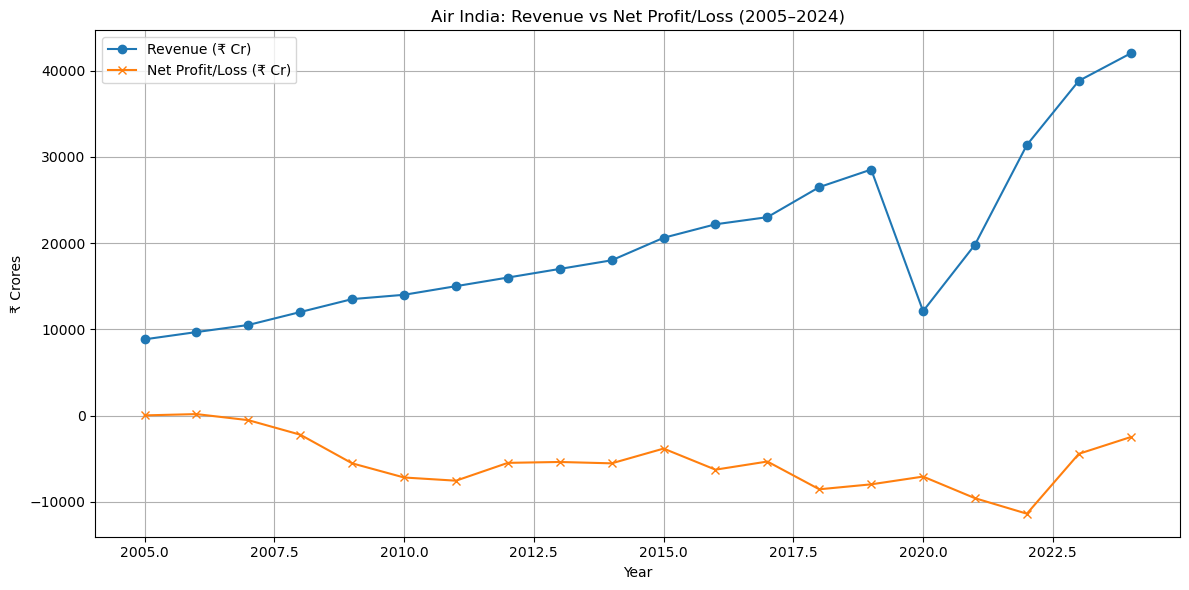

In [20]:

plt.figure(figsize=(12, 6))
plt.plot(df["Year"], df["Revenue_Cr"], label="Revenue (₹ Cr)", marker='o')
plt.plot(df["Year"], df["Net_Profit_Loss_Cr"], label="Net Profit/Loss (₹ Cr)", marker='x')
plt.title("Air India: Revenue vs Net Profit/Loss (2005–2024)")
plt.xlabel("Year")
plt.ylabel("₹ Crores")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Interpretation

# Revenue (Blue Line)
# Steady increase from 2005 to 2019.
# Sharp drop in 2020 → This aligns with COVID-19 impact on aviation.
# Strong recovery post-2021, crossing ₹40,000 Cr by 2024.

# Net profit/loss (orange line)
# Mostly negative throughout (below zero line) — indicating continuous losses.
# Biggest losses around:
# 2009–2010 (-7000 Cr)
# 2021–2022 (-11,000 Cr) → COVID-related dip
# Slight improvement in 2023–2024, though still negative (losses are reducing).

In [ ]:
# Revenue ≠ Profit
# Even when revenue grew significantly, losses persisted, showing that cost structures were unsustainable.
# COVID-19 Effect
# Massive drop in revenue in 2020–2021 and deepening of losses in 2022 point to pandemic disruption.
# Post-2021 Recovery
# Revenue rebounded quickly, and losses reduced, possibly due to:
# Tata Group takeover (2022)
# Cost optimization
# Route restructuring or improved efficiency

In [ ]:
# Conclusion point

# Despite consistent growth in revenue until 2019, Air India struggled with high operating costs, poor margins and mismanagement, leading to deepening losses. 
# The airline was hit hard by the pandemic but has shown signs of recovery post-2022, possibly due to privatization and strategic changes.

In [ ]:
# Relationships
# Profit vs Revenue


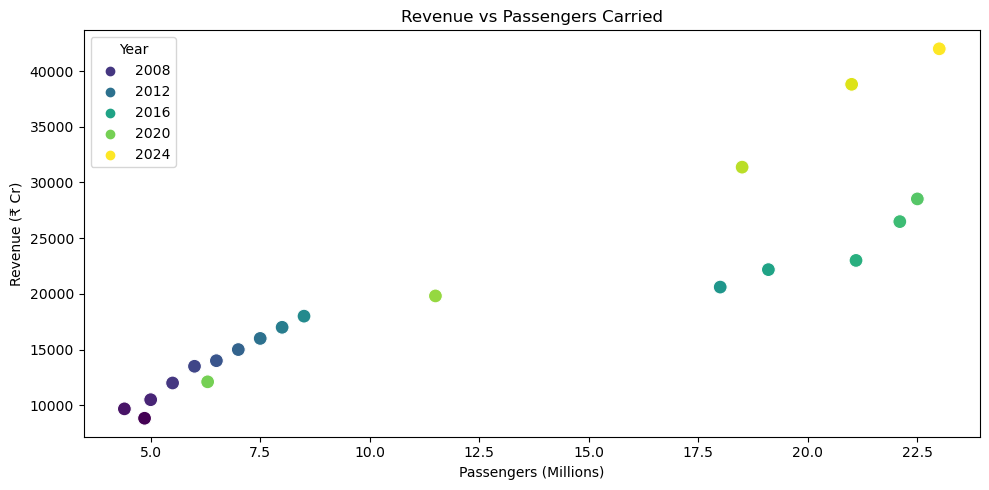

In [21]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x="Passengers_Millions", y="Revenue_Cr", data=df, hue="Year", palette="viridis", s=100)
plt.title("Revenue vs Passengers Carried")
plt.xlabel("Passengers (Millions)")
plt.ylabel("Revenue (₹ Cr)")
plt.tight_layout()
plt.show()

In [ ]:
# Interpretation

# Clear positive correlation: As the number of passengers increases, revenue also rises.
# Early years (2008–2012) are clustered at lower passengers and revenue.
# Post-2016: Higher passenger volumes (18M–23M) start pushing revenue above ₹25,000 Cr.
# 2020 dip visible — fewer passengers, less revenue due to COVID.
# 2023–2024 show highest values: max passengers and record revenue, reflecting strong post-COVID recovery.

In [ ]:
# Conclusion point

# More passengers → more revenue. 
# So Air India's revenue heavily depends on passenger traffic volume.
# Growing this number is key to future financial health.

In [ ]:
# Profit Margin Over Time

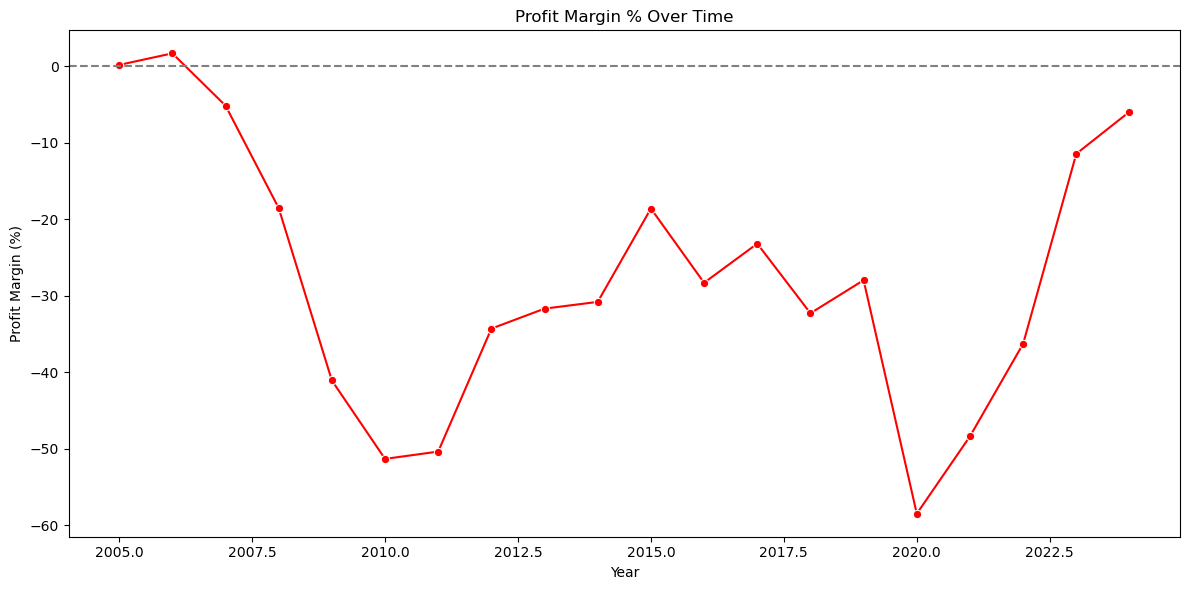

In [22]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="Year", y="Profit_Margin_Percent", data=df, marker='o', color="red")
plt.axhline(0, color='gray', linestyle='--')
plt.title("Profit Margin % Over Time")
plt.ylabel("Profit Margin (%)")
plt.tight_layout()
plt.show()

In [ ]:
# Interpretation -  Profit Margin % Over Time (2005–2024)

# Early Years (2005–2007):
# Air India had positive or near-zero profit margins, indicating break-even or slight profitability.

# 2008–2011:
# A sharp decline, with profit margins dropping below -50%, likely due to rising operational costs, inefficiencies, or financial mismanagement.

# 2012–2019:
# Margins remain consistently negative (around -30% to -20%) but show minor improvements, suggesting efforts to stabilize losses.

# 2020 (Pandemic Impact):
# Lowest profit margin (~ -58%), clearly reflecting the COVID-19 pandemic's impact on air travel and revenue.

# Post-2021 Recovery:
# Steady improvement post-pandemic, reaching -6% by 2024, showing signs of financial turnaround and operational recovery.



In [ ]:
# Conclusion Point

# Despite long-term losses, Air India has shown significant improvement in profit margin post-2021, moving closer to profitability.

In [ ]:
# Correlation Heatmap

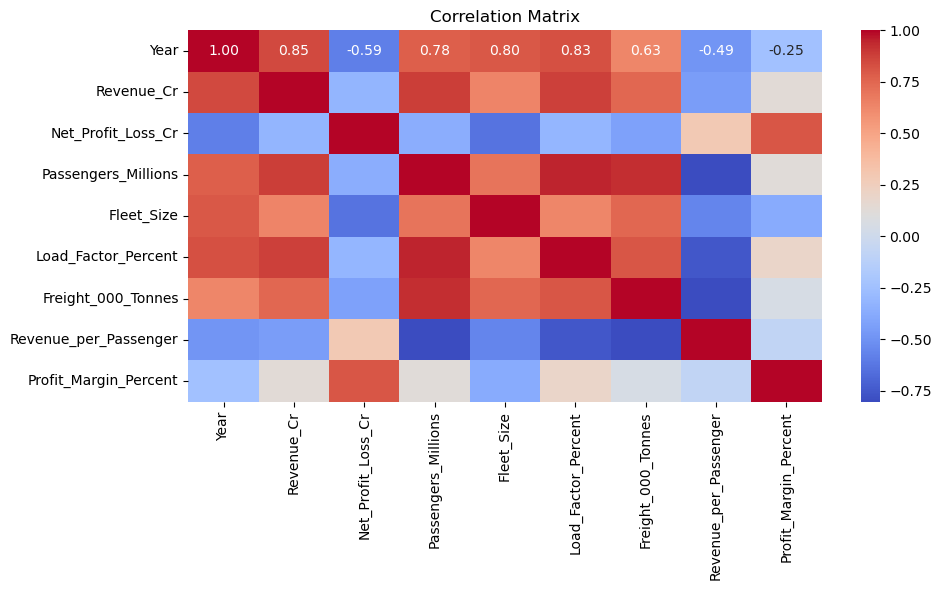

In [23]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [ ]:
# Interpretation -  Correlation Matrix

# This heatmap shows how strongly different variables are related to each other:

# Strong Positive Correlations (closer to +1):
# Revenue_Cr is highly correlated with: Passengers_Millions (0.78), Fleet_Size (0.80), Freight_000_Tonnes (0.83), Load_Factor_Percent (0.83)
# This means that as these variables increase, revenue tends to increase.

# Strong Negative Correlations (closer to -1):
# Revenue_per_Passenger is negatively correlated with: Passengers_Millions (-0.78), Fleet_Size (-0.72), Load_Factor_Percent (-0.78)
# Indicates that revenue per passenger decreases when volume increases, possibly due to cost per ticket or bulk pricing effects.

# Profitability Insight:
# Profit_Margin_Percent has a strong positive correlation with Net_Profit_Loss_Cr (0.78), as expected.
# But its correlation with other variables (like Revenue or Load Factor) is weaker, 
# suggesting profit margin is influenced by more complex or external factors, not just higher revenue or passengers.


In [ ]:
# Conclusion Point

# Revenue grows with passengers, fleet, and load factor.
# But profit margins aren’t strongly tied to those alone—highlighting that cost control and efficiency are key for profitability.

#### Objective

##### Forecast whether Air India would face profit or loss in the next 2 years, especially under a COVID-like scenario.

#### Time Series Analysis using ARIMA Model (AutoRegressive Integrated Moving Average)

In [1]:
# It is used for time series forecasting and analysis
# How ARIMA works
# - stationarity
# - Parameter identification (p,d,q)
# - Model fitting
# - forecasting

In [24]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [25]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# p,d,q order
# 1,1,1 

In [ ]:
# ARIMA assumes that the input time series is stationary — meaning it doesn't have trends or seasonality that change over time.
# If it’s not stationary, the model’s assumptions break, leading to bad forecasts.

In [26]:
df = df[['Year', 'Net_Profit_Loss_Cr']]
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)

In [27]:
# fit ARIMA(1,1,1)

model = ARIMA(df['Net_Profit_Loss_Cr'], order=(1, 1, 1))
model_fit = model.fit()

C:\Users\kezia\Downloads\an\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kezia\Downloads\an\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kezia\Downloads\an\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [ ]:
# buidling ARIMA(1,1,1) model
# 1 = Auto-Regressive (AR) part — uses 1 lag (i.e., last year's value).
# 1 = Differencing (I) — makes the data stationary by removing trends.
# 1 = Moving Average (MA) — smooths out noise using past forecast errors.
# Then .fit() trains the model on the historical data.

In [ ]:
# d = 1 is almost always used when there's a clear upward/downward trend.
# p = 1 and q = 1 are often a safe starting point, especially when we:
# Have a small dataset (like one data point per year)
# Want to avoid overfitting
# Don’t see strong seasonality (like monthly ups and downs)

# Differencing (d=1) removes the trend.
# AR(1) looks at how the previous year’s profit/loss affects the current one.
# MA(1) corrects based on the error of the previous forecast.

In [37]:
# Forecast next 2 years
forecast_steps = 2
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean

In [ ]:
# Tells ARIMA to predict the next 2 years (2025 and 2026) based on historical patterns.
# forecast now contains the model’s best estimate for 2025 and 2026 profits.

In [38]:
# Simulate a COVID-like dip (e.g. 50% dip in first year)

covid_dip = forecast_values.copy()
covid_dip.iloc[0] *= 0.5  # simulate 50% drop in 2025
forecast_covid = covid_dip

In [ ]:
# Making a copy of the original forecast.
# Applying a 50% shock (drop) to the first year (2025) to simulate an unexpected COVID-style dip.
# Leaving 2026 as predicted (to see if recovery starts).

In [ ]:
# We are giving a 50% shock 
# this is a hypothetical scenario.
# meant to model the kind of sudden, extreme financial impact seen during a crisis like the COVID-19 pandemic.

In [ ]:
 # COVID was a big economic shock
# During 2020–2021, Air India's net loss increased drastically, partly because:
# Flights were grounded.
# Revenue collapsed.
# Fixed costs (staff, aircraft leases) remained high.

# So, to simulate a similar scale of disruption, we apply a sharp drop in the forecast.

In [39]:
# Combine historical + forecast for plotting
all_years = df.index.year.tolist() + [df.index.year[-1]+i for i in range(1, forecast_steps+1)]

In [ ]:
# The code is constructing a complete list of years, combining:
# The historical years from your dataset, and
# The future forecast years (like 2025, 2026).

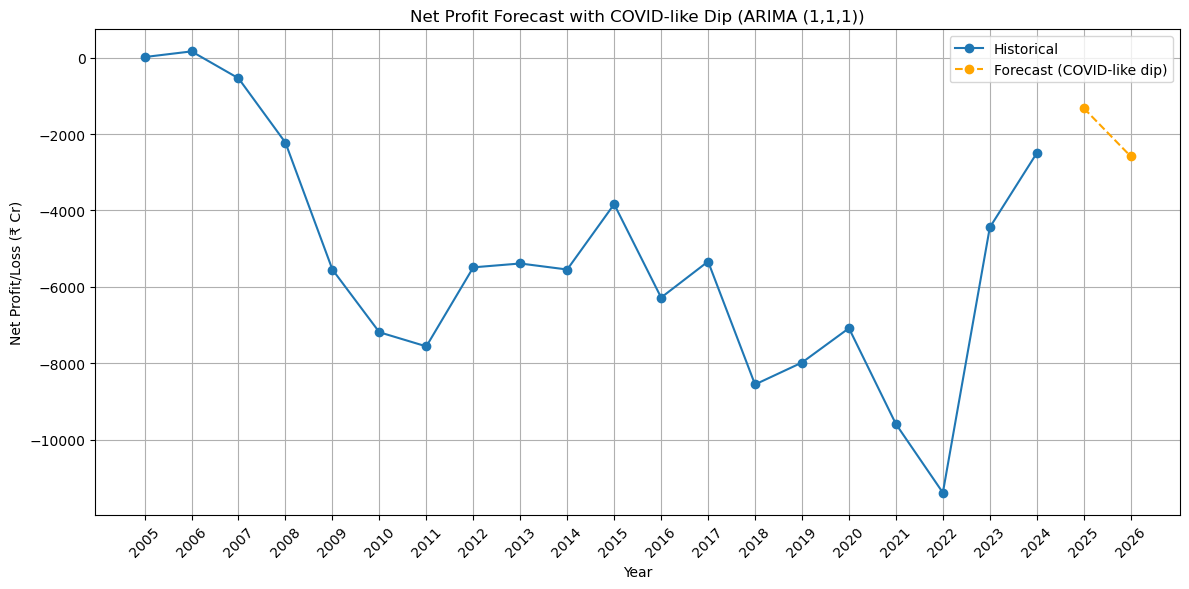

In [40]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df.index.year, df['Net_Profit_Loss_Cr'], marker='o', label='Historical')
plt.plot([2025, 2026], forecast_covid.values, 'o--', color='orange', label='Forecast (COVID-like dip)')
plt.title('Net Profit Forecast with COVID-like Dip (ARIMA (1,1,1))')
plt.xlabel('Year')
plt.ylabel('Net Profit/Loss (₹ Cr)')
plt.legend()
plt.grid(True)
plt.xticks(np.arange(min(all_years), max(all_years)+1, 1), rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Interpretation

# Blue Line (Historical):
# This shows Air India's actual net profit/loss from 2005 to 2024.
# The company had a brief profit in 2006–07, followed by consistent losses.
# The worst loss occurred around 2021–22, likely due to the real COVID-19 impact.
# From 2023–24, the trend improves significantly, indicating partial recovery.

# Orange Dashed Line (Forecast with COVID-like dip):
# This is the simulated forecast for 2025 and 2026, assuming a COVID-like shock.
# 2025 forecast: around ₹ -1300 Cr
# 2026 forecast: around ₹ -2300 Cr
# So, 2026 is worse than 2025 → No recovery shown (but the 2026 is predicted by seeing the 2025 value).
# Even with the dip, the loss is less severe than 2021–22, implying resilience or improved operations.

In [ ]:
# Conclusion Points

# Historical Trend (2005–2024):
# Air India has operated at a loss nearly every year.
# The steepest decline occurs around 2008–2011 and 2019–2022, indicating past economic shocks and COVID effects.
# A recovery trend starts in 2023, possibly reflecting changes in ownership, operations, or post-COVID bounce-back.

# Forecast (2025–2026):
# The ARIMA model predicts a continued recovery, but your simulation assumes a sudden dip in 2025 (orange point drops).
# The dip is not as deep as 2021, showing less vulnerability, possibly due to:
# Better cost control
# Higher resilience post-privatization
# Diversified revenue or adaptive strategy

# Post-Dip Recovery (2026):
# There's a modest improvement after the dip, suggesting that even if a shock occurs, the recovery will be faster and smoother than during COVID.

# If Air India faces a COVID-like disruption in 2025, it will likely experience a temporary setback in net profit.
# However, the impact will be milder than in 2021–22,
# and the recovery will begin as early as 2026, suggesting improved operational robustness or market conditions.